In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


random.seed(75)
SIZE = 256 

### 1. Построить три графа (размерностью не менее 100 вершин каждый)
#### 1.1 Случайный граф

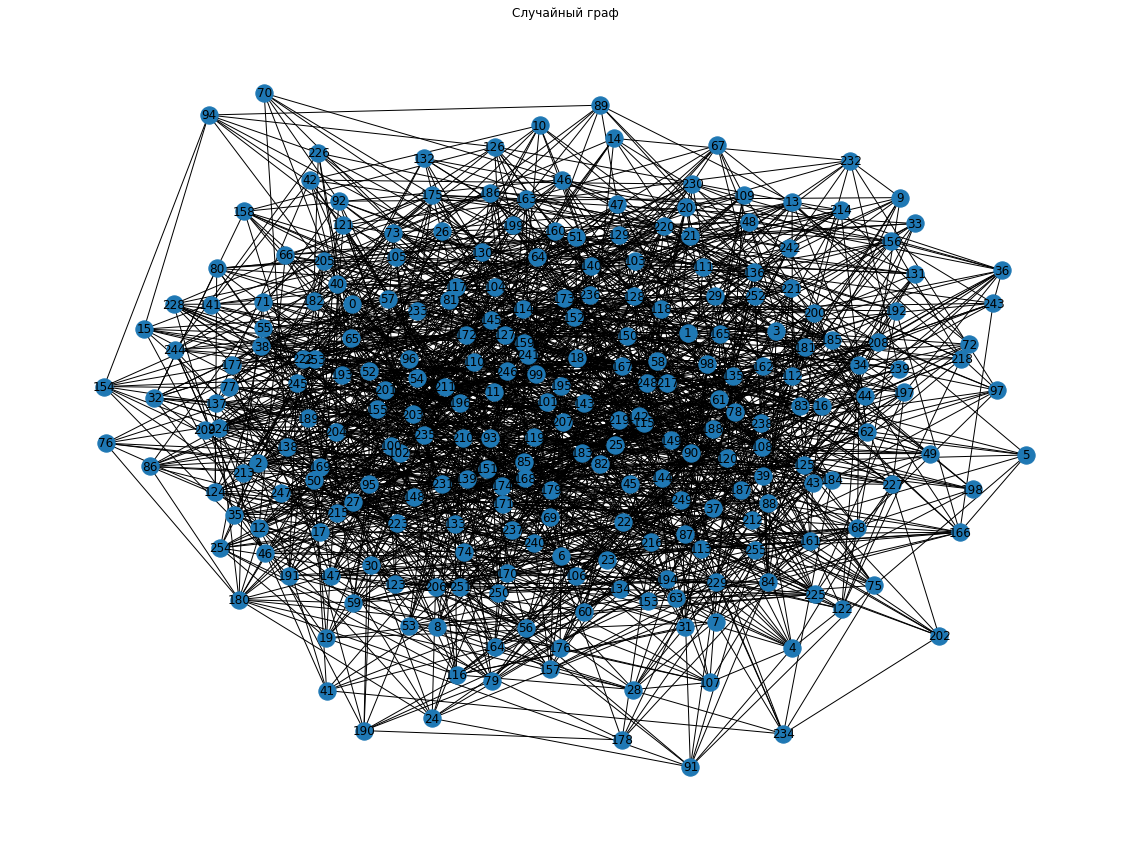

In [ ]:
G_random = nx.dense_gnm_random_graph(
    n=SIZE, 
    m=int(random.expovariate(10 / sum(range(SIZE)))), 
    seed=74 
  )


fig, ax = plt.subplots(figsize=(20, 15))  
nx.draw(G_random, with_labels=True) 
ax.set_title('Случайный граф');

#### 1.2 Самоподобный граф

Пошаговая визуализация добавления вершин в граф:


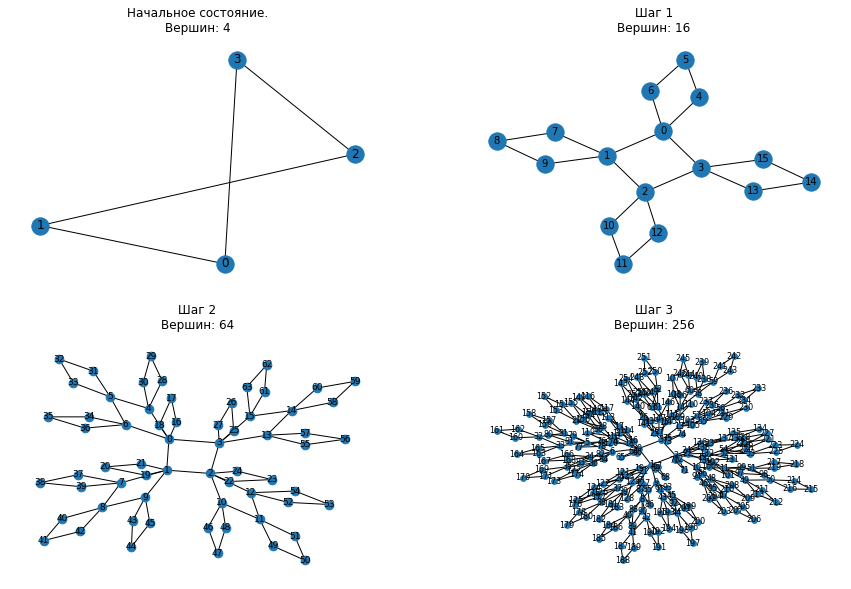

In [ ]:
G_fractal = nx.Graph([[i, (i+1) % 4] for i in range(4)])
print('Пошаговая визуализация добавления вершин в граф:')

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

nx.draw(G_fractal, with_labels=True, ax=ax[0, 0])
ax[0,0].set_title(f'Начальное состояние.\nВершин: {len(G_fractal)}')


for step in range(1, 4):
      f_nodes = list(G_fractal.nodes())  
          i = iter(range(f_nodes[-1] + 1, 1000))  
              for node in f_nodes:    
                a, b, c = next(i), next(i), next(i)
                G_fractal.add_edges_from((
                    (node, a),
                    (a, b),
                    (b, c),
                    (c, node),
                  ))
                  nx.draw(
                      G_fractal, 
                      pos=nx.kamada_kawai_layout(G_fractal), 
                      with_labels=True,       
                      ax=ax[step//2, step%2], 
                      node_size=300//(step**2),  
                      font_size=int(12-step*1.3)
                    )
                      ax[step//2, step%2].set_title(f'Шаг {step}\nВершин: {len(G_fractal)}')

#### 1.2 Граф малого мира

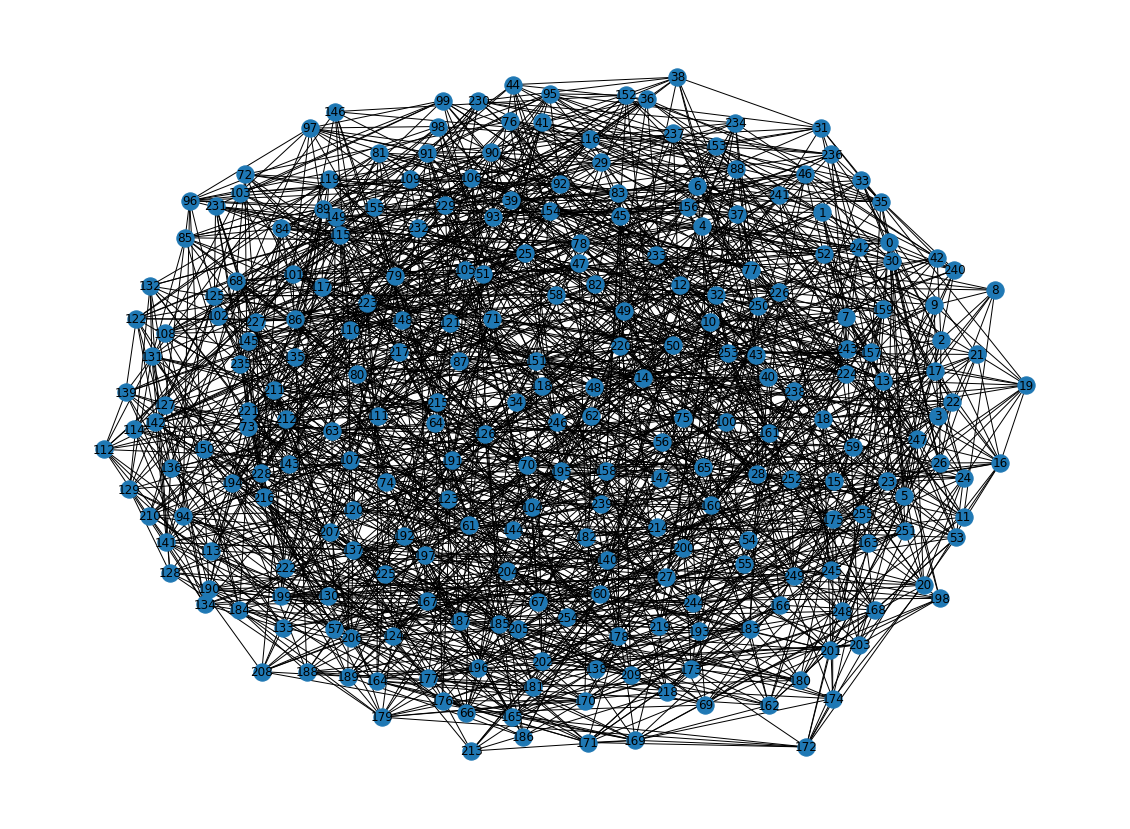

In [ ]:
G_sw = nx.watts_strogatz_graph(
    SIZE,  
    14,  
    0.6, 
    seed=74
    )

fig, ax = plt.subplots(figsize=(20, 15))
nx.draw(
    G_sw, 
    pos=nx.kamada_kawai_layout(G_sw), 
    with_labels=True,
  )

#### 2. Для каждого построенного графа рассчитать его метрические характеристики (радиус, диаметр и т.п.).

In [ ]:
gs = [G_random, G_fractal, G_sw]
metrics = pd.DataFrame({
    'radius': [],
    'diameter': [],
    'center': [],
    'periphery': [],
})
for g in gs:
      metrics.loc[len(metrics)] = [nx.radius(g), nx.diameter(g), len(nx.center(g)), len(nx.periphery(g))]

graph_names = ['Случайный граф', 'Самоподобный граф', 'Граф малого мира']
metrics.index = graph_names

metrics

,radius,diameter,center,periphery
Случайный граф,3.0,4.0,232.0,24.0
Самоподобный граф,8.0,14.0,4.0,4.0
Граф малого мира,3.0,4.0,236.0,20.0


#### 3. Для каждого графа рассчитать показатели доступности, показатели связности, показатели формы графа, меры центральности.
Построим матрицы кратчайших расстояний между вершинами графов:

In [ ]:
shortest_paths_random = np.zeros([SIZE, SIZE])
for a in G_random.nodes():
      for b in G_random.nodes():
        shortest_paths_random[a][b] = nx.shortest_path_length(G_random, a, b)

shortest_paths_random

array([[0., 3., 2., ..., 2., 2., 2.],
       [3., 0., 3., ..., 2., 2., 2.],
       [2., 3., 0., ..., 2., 2., 3.],
       ...,
       [2., 2., 2., ..., 0., 2., 3.],
       [2., 2., 2., ..., 2., 0., 2.],
       [2., 2., 3., ..., 3., 2., 0.]])

In [ ]:
shortest_paths_fractal = np.zeros([SIZE, SIZE])
for a in G_fractal.nodes():
      for b in G_fractal.nodes():
        shortest_paths_fractal[a][b] = nx.shortest_path_length(G_fractal, a, b)

shortest_paths_fractal

array([[0., 1., 2., ..., 4., 5., 4.],
       [1., 0., 1., ..., 5., 6., 5.],
       [2., 1., 0., ..., 4., 5., 4.],
       ...,
       [4., 5., 4., ..., 0., 1., 2.],
       [5., 6., 5., ..., 1., 0., 1.],
       [4., 5., 4., ..., 2., 1., 0.]])

In [ ]:
shortest_paths_sw = np.zeros([SIZE, SIZE])
for a in G_sw.nodes():
      for b in G_sw.nodes():
        shortest_paths_sw[a][b] = nx.shortest_path_length(G_sw, a, b)

shortest_paths_sw

array([[0., 1., 1., ..., 2., 2., 1.],
       [1., 0., 2., ..., 2., 3., 2.],
       [1., 2., 0., ..., 2., 2., 1.],
       ...,
       [2., 2., 2., ..., 0., 3., 3.],
       [2., 3., 2., ..., 3., 0., 1.],
       [1., 2., 1., ..., 3., 1., 0.]])

Рассчитаем показатели доступности графов:

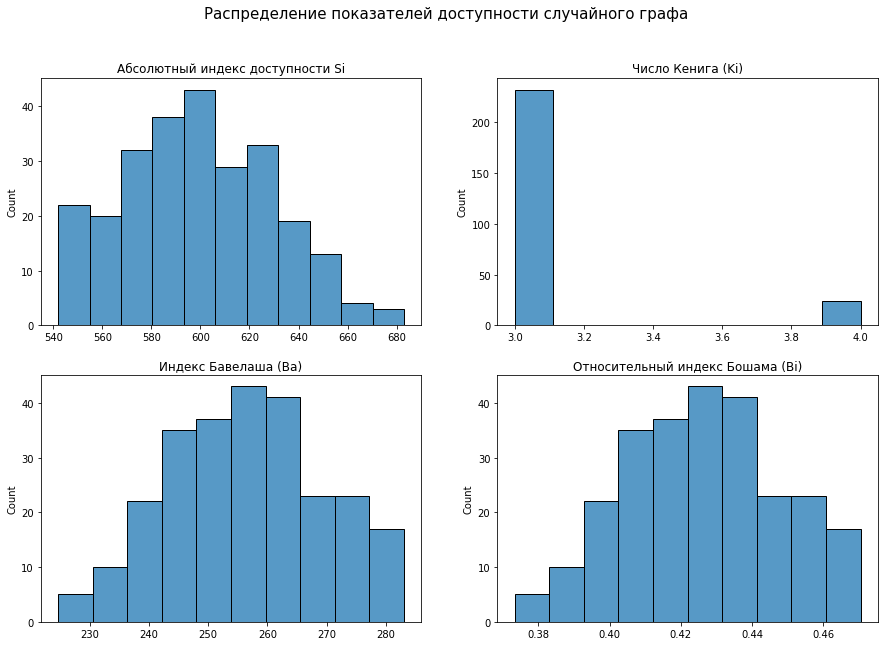

In [ ]:
si_random = shortest_paths_random.sum(axis=0)  
ki_random = shortest_paths_random.max(axis=0)  
ba_random = si_random.sum() / si_random  
bi_random = (SIZE - 1) / si_random  

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей доступности случайного графа", fontsize=15)
sns.histplot(x=si_random, ax=ax[0,0]);
sns.histplot(x=ki_random, ax=ax[0,1]);
sns.histplot(x=ba_random, ax=ax[1,0]);
sns.histplot(x=bi_random, ax=ax[1,1]);
ax[0,0].set_title('Абсолютный индекс доступности Si')
ax[0,1].set_title('Число Кенига (Ki)')
ax[1,0].set_title('Индекс Бавелаша (Ва)')
ax[1,1].set_title('Относительный индекс Бошама (Bi)');


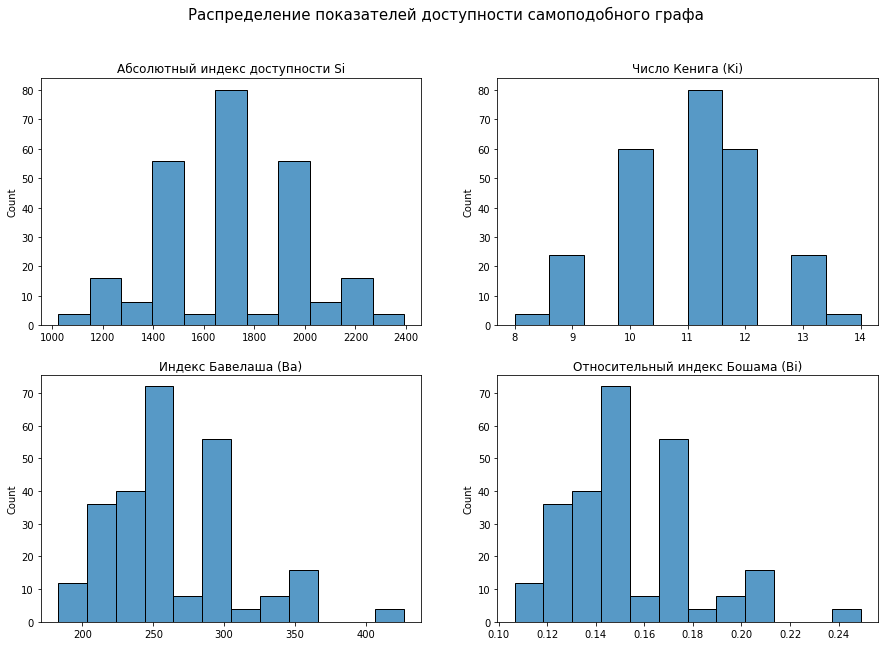

In [ ]:
si_fractal = shortest_paths_fractal.sum(axis=0) 
ki_fractal = shortest_paths_fractal.max(axis=0)  
ba_fractal = si_fractal.sum() / si_fractal 
bi_fractal = (SIZE - 1) / si_fractal  

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей доступности самоподобного графа", fontsize=15)
sns.histplot(x=si_fractal, ax=ax[0,0]);
sns.histplot(x=ki_fractal, ax=ax[0,1]);
sns.histplot(x=ba_fractal, ax=ax[1,0]);
sns.histplot(x=bi_fractal, ax=ax[1,1]);
ax[0,0].set_title('Абсолютный индекс доступности Si')
ax[0,1].set_title('Число Кенига (Ki)')
ax[1,0].set_title('Индекс Бавелаша (Ва)')
ax[1,1].set_title('Относительный индекс Бошама (Bi)');


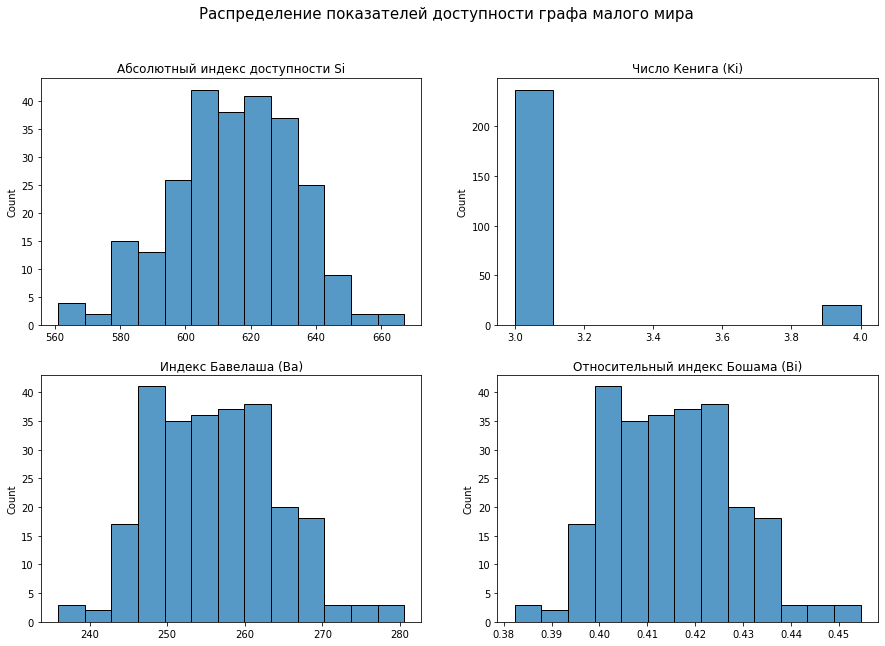

In [ ]:
si_sw = shortest_paths_sw.sum(axis=0)  
ki_sw = shortest_paths_sw.max(axis=0)  
ba_sw = si_sw.sum() / si_sw  
bi_sw = (SIZE - 1) / si_sw 

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей доступности графа малого мира", fontsize=15)
sns.histplot(x=si_sw, ax=ax[0,0]);
sns.histplot(x=ki_sw, ax=ax[0,1]);
sns.histplot(x=ba_sw, ax=ax[1,0]);
sns.histplot(x=bi_sw, ax=ax[1,1]);
ax[0,0].set_title('Абсолютный индекс доступности Si')
ax[0,1].set_title('Число Кенига (Ki)')
ax[1,0].set_title('Индекс Бавелаша (Ва)')
ax[1,1].set_title('Относительный индекс Бошама (Bi)');


Рассчитаем показатели связности графов:

In [ ]:
m_random = len(G_random.edges())

alpha_random = (m_random - SIZE + 1) / (2 * SIZE - 5) 
beta_random = m_random / SIZE  
gamma_random = m_random / sum(range(SIZE))  


print(f'Индекс α случайного графа: {alpha_random} (По идее он не должен быть больше единицы.\nВероятно, формула максимального числа циклов в презентации не подходит к нашему графу)')
print(f'Индекс β случайного графа: {beta_random}')
print(f'Индекс γ случайного графа: {gamma_random}')

Индекс α случайного графа: 3.1893491124260356 (По идее он не должен быть больше единицы.
Вероятно, формула максимального числа циклов в презентации не подходит к нашему графу)
Индекс β случайного графа: 7.3125
Индекс γ случайного графа: 0.057352941176470586


In [ ]:
m_fractal = len(G_fractal.edges())

alpha_fractal = (m_fractal - SIZE + 1) / (2 * SIZE - 5) 
beta_fractal = m_fractal / SIZE 
gamma_fractal = m_fractal / sum(range(SIZE))  


print(f'Индекс α самоподобного графа: {alpha_fractal}')
print(f'Индекс β самоподобного графа: {beta_fractal}')
print(f'Индекс γ самоподобного графа: {gamma_fractal} (Относительно количества ребер в полном графе.\nВозможно, правильное значение - единица, потому что в таком графе может быть только один вариант расположения ребер)')

Индекс α самоподобного графа: 0.16765285996055226
Индекс β самоподобного графа: 1.328125
Индекс γ самоподобного графа: 0.010416666666666666 (Относительно количества ребер в полном графе.
Возможно, правильное значение - единица, потому что в таком графе может быть только один вариант расположения ребер)


In [ ]:
m_sw = len(G_sw.edges())

alpha_sw = (m_sw - SIZE + 1) / (2 * SIZE - 5) 
beta_sw = m_sw / SIZE 
gamma_sw = m_sw / sum(range(SIZE))  


print(f'Индекс α графа малого мира: {alpha_sw} (По идее он не должен быть больше единицы.\nВероятно, формула максимального числа циклов в презентации не подходит к нашему графу)')
print(f'Индекс β графа малого мира: {beta_sw}')
print(f'Индекс γ графа малого мира: {gamma_sw}')

Индекс α графа малого мира: 3.0315581854043394 (По идее он не должен быть больше единицы.
Вероятно, формула максимального числа циклов в презентации не подходит к нашему графу)
Индекс β графа малого мира: 7.0
Индекс γ графа малого мира: 0.054901960784313725


Рассчитаем показатели формы графов:

In [ ]:
pi_random = m_random / nx.diameter(G_random)

print(f'Топологическая мера формы (π^r) случайного графа: {pi_random}')

Топологическая мера формы (π^r) случайного графа: 468.0


In [ ]:
pi_fractal = m_fractal / nx.diameter(G_fractal)

print(f'Топологическая мера формы (π^r) самоподобного графа: {pi_fractal}')

Топологическая мера формы (π^r) самоподобного графа: 24.285714285714285


In [ ]:
pi_sw = m_sw / nx.diameter(G_sw)

print(f'Топологическая мера формы (π^r) графа малого мира: {pi_sw}')

Топологическая мера формы (π^r) графа малого мира: 448.0


Рассчитаем показатели центральности графов:

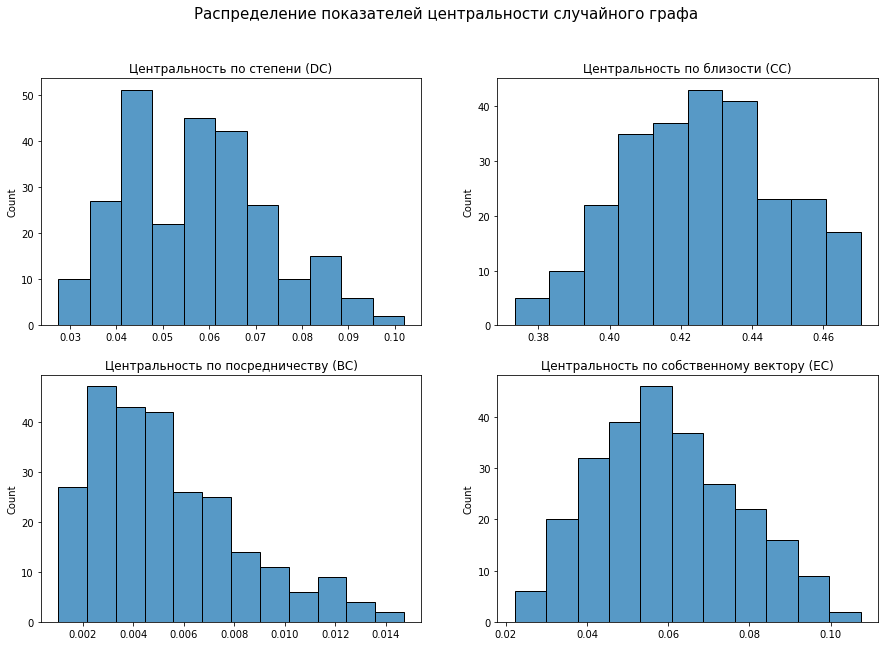

In [ ]:
dc_random = nx.degree_centrality(G_random)
cc_random = nx.closeness_centrality(G_random)
bc_random = nx.betweenness_centrality(G_random)
ec_random = nx.eigenvector_centrality(G_random)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей центральности случайного графа", fontsize=15)
sns.histplot(x=dc_random, ax=ax[0,0]);
sns.histplot(x=cc_random, ax=ax[0,1]);
sns.histplot(x=bc_random, ax=ax[1,0]);
sns.histplot(x=ec_random, ax=ax[1,1]);
ax[0,0].set_title('Центральность по степени (DC)')
ax[0,1].set_title('Центральность по близости (CC)')
ax[1,0].set_title('Центральность по посредничеству (BC)')
ax[1,1].set_title('Центральность по собственному вектору (EC)');


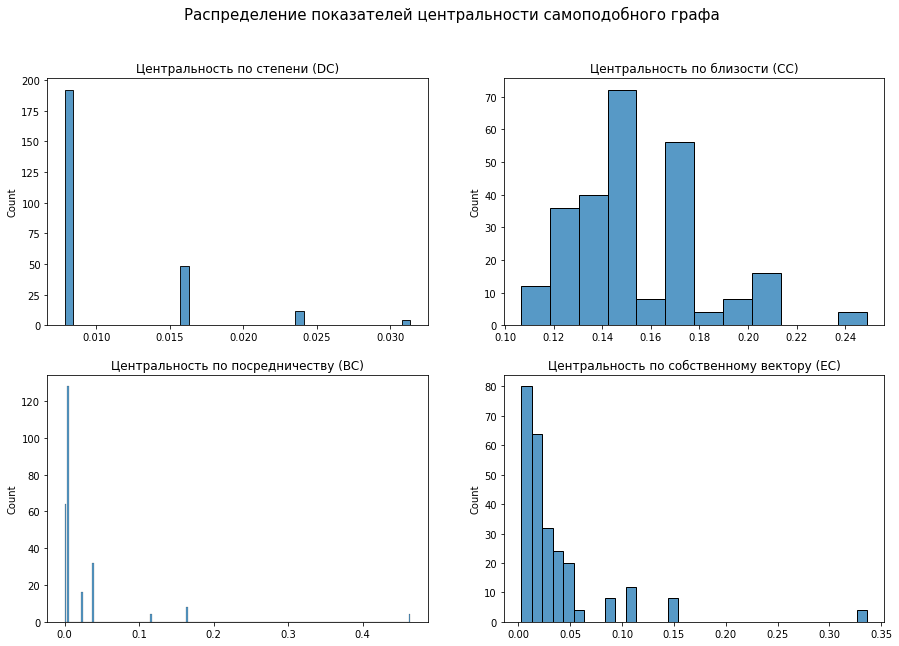

In [ ]:
dc_fractal = nx.degree_centrality(G_fractal)
cc_fractal = nx.closeness_centrality(G_fractal)
bc_fractal = nx.betweenness_centrality(G_fractal)
ec_fractal = nx.eigenvector_centrality(G_fractal)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей центральности самоподобного графа", fontsize=15)
sns.histplot(x=dc_fractal, ax=ax[0,0]);
sns.histplot(x=cc_fractal, ax=ax[0,1]);
sns.histplot(x=bc_fractal, ax=ax[1,0]);
sns.histplot(x=ec_fractal, ax=ax[1,1]);
ax[0,0].set_title('Центральность по степени (DC)')
ax[0,1].set_title('Центральность по близости (CC)')
ax[1,0].set_title('Центральность по посредничеству (BC)')
ax[1,1].set_title('Центральность по собственному вектору (EC)');


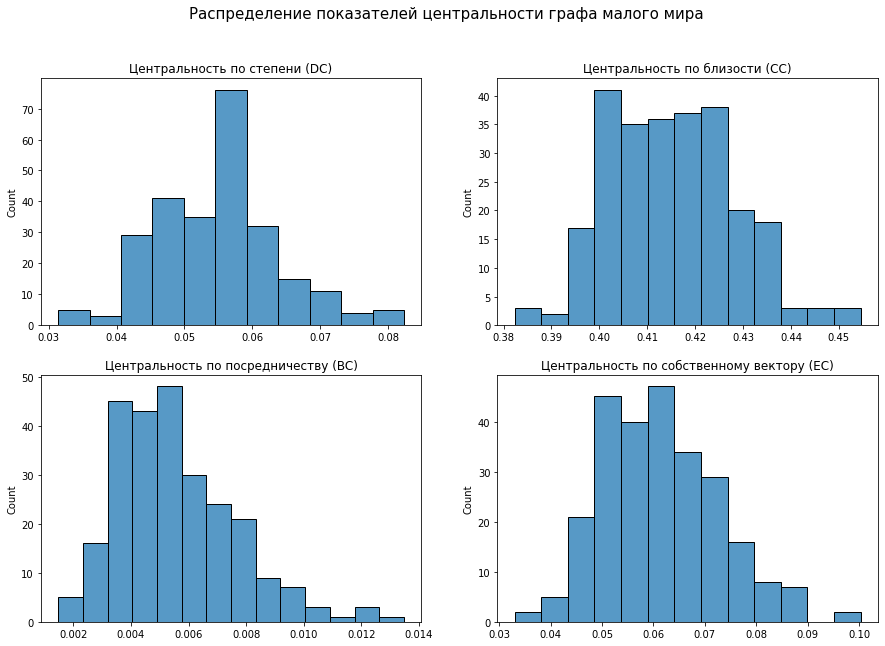

In [ ]:
dc_sw = nx.degree_centrality(G_sw)
cc_sw = nx.closeness_centrality(G_sw)
bc_sw = nx.betweenness_centrality(G_sw)
ec_sw = nx.eigenvector_centrality(G_sw)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Распределение показателей центральности графа малого мира", fontsize=15)
sns.histplot(x=dc_sw, ax=ax[0,0]);
sns.histplot(x=cc_sw, ax=ax[0,1]);
sns.histplot(x=bc_sw, ax=ax[1,0]);
sns.histplot(x=ec_sw, ax=ax[1,1]);
ax[0,0].set_title('Центральность по степени (DC)')
ax[0,1].set_title('Центральность по близости (CC)')
ax[1,0].set_title('Центральность по посредничеству (BC)')
ax[1,1].set_title('Центральность по собственному вектору (EC)');


#### 4. Сравнить рассчитанные показатели построенных графов.

Сравним показатели доступности графов:

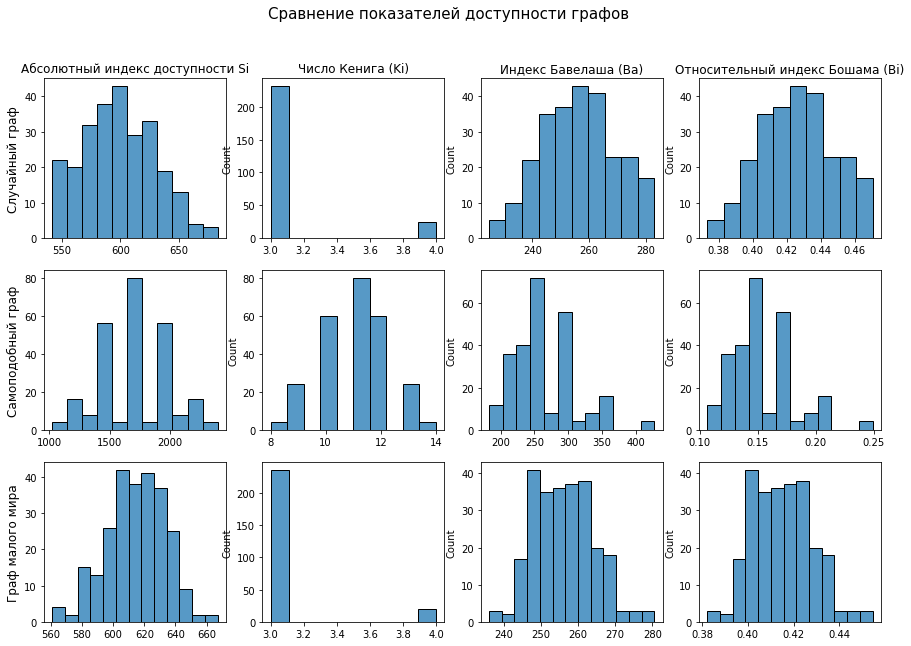

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Сравнение показателей доступности графов", fontsize=15)
sns.histplot(x=si_random, ax=ax[0,0])
sns.histplot(x=ki_random, ax=ax[0,1])
sns.histplot(x=ba_random, ax=ax[0,2])
sns.histplot(x=bi_random, ax=ax[0,3])
sns.histplot(x=si_fractal, ax=ax[1,0])
sns.histplot(x=ki_fractal, ax=ax[1,1])
sns.histplot(x=ba_fractal, ax=ax[1,2])
sns.histplot(x=bi_fractal, ax=ax[1,3])
sns.histplot(x=si_sw, ax=ax[2,0])
sns.histplot(x=ki_sw, ax=ax[2,1])
sns.histplot(x=ba_sw, ax=ax[2,2])
sns.histplot(x=bi_sw, ax=ax[2,3])

ax[0,0].set_title('Абсолютный индекс доступности Si')
ax[0,1].set_title('Число Кенига (Ki)')
ax[0,2].set_title('Индекс Бавелаша (Ва)')
ax[0,3].set_title('Относительный индекс Бошама (Bi)')

for ax, row in zip(ax[:,0], graph_names):
    ax.set_ylabel(row, size='large');

Сравним показатели связности графов:

In [ ]:
connectivity = pd.DataFrame(
    {
        'Индекс α': [alpha_random, alpha_fractal, alpha_sw],
        'Индекс β': [beta_random, beta_fractal, beta_sw],
        'Индекс γ': [gamma_random, gamma_fractal, gamma_sw],
    },
    index=graph_names,
)

connectivity

,Индекс α,Индекс β,Индекс γ
Случайный граф,3.189349,7.312500,0.057353
Самоподобный граф,0.167653,1.328125,0.010417
Граф малого мира,3.031558,7.000000,0.054902


Сравним показатели формы графов:

In [ ]:
form = pd.DataFrame(
    {
        'Топологическая мера формы': [pi_random, pi_fractal, pi_sw]
    },
    index=graph_names,
)

form

,Топологическая мера формы
Случайный граф,468.000000
Самоподобный граф,24.285714
Граф малого мира,448.000000


Сравним показатели центральности графов:

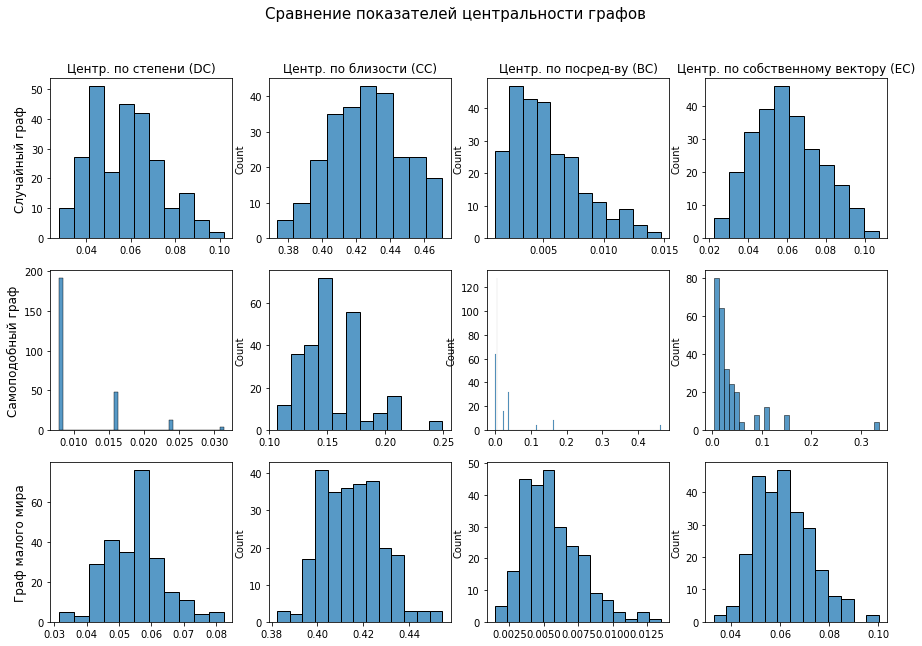

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Сравнение показателей центральности графов", fontsize=15)
sns.histplot(x=dc_random, ax=ax[0,0])
sns.histplot(x=cc_random, ax=ax[0,1])
sns.histplot(x=bc_random, ax=ax[0,2])
sns.histplot(x=ec_random, ax=ax[0,3])
sns.histplot(x=dc_fractal, ax=ax[1,0])
sns.histplot(x=cc_fractal, ax=ax[1,1])
sns.histplot(x=bc_fractal, ax=ax[1,2])
sns.histplot(x=ec_fractal, ax=ax[1,3])
sns.histplot(x=dc_sw, ax=ax[2,0])
sns.histplot(x=cc_sw, ax=ax[2,1])
sns.histplot(x=bc_sw, ax=ax[2,2])
sns.histplot(x=ec_sw, ax=ax[2,3])

ax[0,0].set_title('Центр. по степени (DC)')
ax[0,1].set_title('Центр. по близости (CC)')
ax[0,2].set_title('Центр. по посред-ву (BC)')
ax[0,3].set_title('Центр. по собственному вектору (EС)')

for ax, row in zip(ax[:,0], graph_names):
    ax.set_ylabel(row, size='large');